## Assignment 21.1
### ACD MDS (Mar 2018 batch) Student: K. Anandaranga

## Problem statement:
### Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn


In [2]:
from sklearn.datasets import load_boston

boston = load_boston()

In [3]:
%matplotlib inline

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [6]:
boston.DESCR

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

In [8]:
boston.data.shape

(506, 13)

In [9]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7')

In [10]:
bos = pd.DataFrame(boston.data)

In [11]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
bos.columns

RangeIndex(start=0, stop=13, step=1)

In [13]:
bos.columns = boston.feature_names

In [14]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
boston.target.shape

(506,)

In [19]:
bos['Price'] = boston.target

In [20]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
X = bos.drop('Price',axis=1)
Y = bos['Price']

In [23]:
lm = LinearRegression() #initialize the model

In [24]:
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
#fitting a linear regression model
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

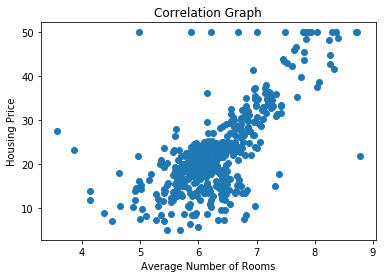

In [28]:
plt.scatter(bos.RM,bos.Price)
plt.xlabel('Average Number of Rooms')
plt.ylabel('Housing Price')
plt.title('Correlation Graph')
plt.show()

In [29]:
lm.predict(X)[0:5]

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,  27.94288232])

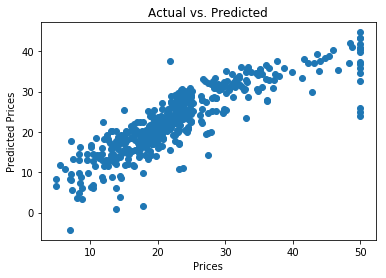

In [30]:
plt.scatter(bos.Price,lm.predict(X))
plt.xlabel('Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted')
plt.show()

In [31]:
#error calculation
np.mean((bos.Price-lm.predict(X))**2)

21.897779217687486

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(X,bos.Price,test_size=0.25,random_state=1234)

In [35]:
print (x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(379, 13) (127, 13) (379,) (127,)


In [36]:
lm = LinearRegression() #again initialize using the training data set

In [37]:
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
pred_t = lm.predict(x_train) #training prediction
pred_test = lm.predict(x_test) # test case prediction

In [40]:
print ('Fiting a model X_train, and calculate MSE with Y_train:', np.mean((y_train - lm.predict(x_train)) ** 2))
print ('Fitting a model X_train, and calculate MSE with X_test, Y_test:', np.mean((y_test - lm.predict(x_test)) ** 2))

Fiting a model X_train, and calculate MSE with Y_train: 21.134042731567785
Fitting a model X_train, and calculate MSE with X_test, Y_test: 27.370763719870695


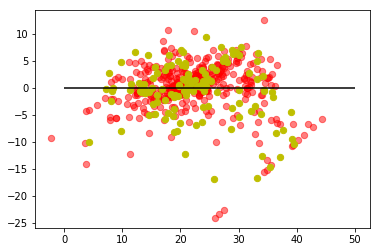

In [42]:
plt.scatter(lm.predict(x_train),lm.predict(x_train)- y_train,c='r',s=40,alpha=0.5)
plt.scatter(lm.predict(x_test),lm.predict(x_test)- y_test,c='y',s=40)
plt.hlines(y=0,xmin=0,xmax=50)
plt.show()

In [47]:
# regression coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ -9.66378735e-02   6.31080432e-02  -1.38069045e-02   2.84516261e+00
  -2.19347661e+01   2.40835980e+00   2.45246610e-03  -1.89020994e+00
   3.56217021e-01  -1.27942145e-02  -1.05991197e+00   1.02040679e-02
  -5.63773228e-01]


In [43]:
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(lm.score(x_test, y_test)))

Variance score: 0.7323523347366839


In [44]:
# plot for residual error
## setting plot style
plt.style.use('fivethirtyeight')

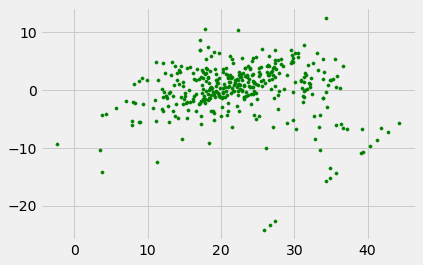

In [45]:
## plotting residual errors in training data
plt.scatter(lm.predict(x_train), lm.predict(x_train) - y_train,
color = "green", s = 10, label = 'Train data')

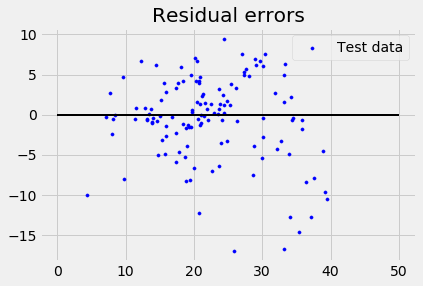

In [46]:
## plotting residual errors in test data
plt.scatter(lm.predict(x_test), lm.predict(x_test) - y_test,
color = "blue", s = 10, label = 'Test data')
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
## plotting legend
plt.legend(loc = 'upper right')
## plot title
plt.title("Residual errors")
plt.show()

##### Residual errors are random, so the model is working well